In [61]:
import numpy as np
from prettytable import PrettyTable


table = PrettyTable(['N',  'x_n', 'y_n', 'f(x_n, y_n)', 'delta'])
td = []

def hook_jeeves(f, x0, delta=0.5, alpha=0.01, eps=1e-5):
    # x0 - начальная точка
    # delta - начальный шаг
    # alpha - ускоряющий множитель
    x = np.array(x0, dtype=float)
    y = np.array(x0, dtype=float)
    n = len(x)
    d = np.eye(n) # координатные направления
    n_iter = 0
    while (delta > eps):
        # Заполнение таблицы
        td.append([n_iter, x[0], y[1], f(*x), delta])
        # Исследующий поиск - спуск по координатным направлениям
        for j in range(n):
            if f(*(y + delta*d[j])) < f(*y):
                y += delta*d[j]
            elif f(*(y - delta*d[j])) < f(*y):
                y -= delta*d[j]
        # Поиск по образцу - ускоряющий шаг по направлению x_(k+1) - x_k
        if f(*y) < f(*x):
            x, y = y, x + alpha * (x - y)
        # Сокращение длины постоянного шага
        else:
            delta /= 2
            
        n_iter += 1
    return x

f = lambda x, y : x**2 + x*y + 2*y**2 + x - y
answer = hook_jeeves(f, [0, 0])

for i in range(len(td)):
    table.add_row(np.round(td[i], 5))

print(table)
print(f"\n\nМинимальное значение в точке: ({answer[0]:3f}, {answer[1]:3f}, {f(*answer):3f})")

+------+----------+---------+-------------+---------+
|  N   |   x_n    |   y_n   | f(x_n, y_n) |  delta  |
+------+----------+---------+-------------+---------+
| 0.0  |   0.0    |   0.0   |     0.0     |   0.5   |
| 1.0  |   -0.5   |  -0.005 |     -0.5    |   0.5   |
| 2.0  |   -0.5   |  0.495  |     -0.5    |   0.25  |
| 3.0  |  -0.745  | 0.50005 |   -0.5637   |   0.25  |
| 4.0  |  -0.745  | 0.50005 |   -0.5637   |  0.125  |
| 5.0  |  -0.745  | 0.37505 |   -0.5637   |  0.0625 |
| 6.0  | -0.68505 | 0.49557 |   -0.57015  |  0.0625 |
| 7.0  | -0.7456  | 0.43759 |   -0.57055  |  0.0625 |
| 8.0  | -0.7456  | 0.43759 |   -0.57055  | 0.03125 |
| 9.0  | -0.71569 | 0.43303 |   -0.57128  | 0.03125 |
| 10.0 | -0.71465 | 0.43764 |   -0.57139  | 0.03125 |
| 11.0 | -0.71465 | 0.43764 |   -0.57139  | 0.01562 |
| 12.0 | -0.71465 | 0.42202 |   -0.57139  | 0.00781 |
| 13.0 | -0.71465 | 0.42983 |   -0.57139  | 0.00391 |
| 14.0 | -0.7118  | 0.43306 |   -0.57142  | 0.00391 |
| 15.0 | -0.71468 | 0.42983 

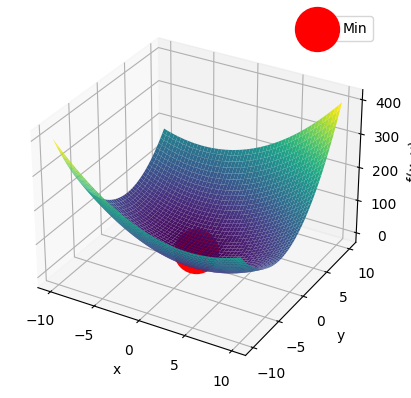

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создание сетки значений x и y
x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Построение 3D-графика функции
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Обозначение минимума функции
ax.scatter(*(list(answer) + [f(*answer)]), color='r', s=1000, label='Min')

# Дополнительное оформление графика
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

# Отображение графика
plt.show()
